**allows image to scale and rotate**

In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy import interpolate

In [3]:
dir = 'C:/Users/15972/OneDrive/桌面/FYP/Model/result.csv'

In [4]:
data = pd.read_csv(dir,  encoding='utf-8')

In [5]:
data

,Alapa,Gamma,Kappa
0,0.5,0.25,0.708
1,0.5,0.50,0.708
2,0.5,0.75,0.704
3,0.5,1.00,0.696
4,0.5,1.25,0.711
5,0.5,1.50,0.712
6,1.0,0.25,0.713
7,1.0,0.50,0.711
8,1.0,0.75,0.711
9,1.0,1.00,0.716


**define a dynamic function Z = f(X,Y)**
It should be a function that its input is matrix

In [6]:
def result_z (X,Y):
    Z = []
    for i in range(len(X)):
        z = []
        for j in range(len(X[0])):
            x = X[i][j]
            y = Y[i][j]
            k = data[(data["Alapa"] == x) & (data["Gamma"] == y)]
            k = k.loc[:,["Kappa"]]
            k = k.to_numpy()
            z.append(k[0][0])
        Z.append(z)
    return Z

C:\Users\15972\AppData\Local\Temp\ipykernel_33016\1322150684.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax1 = Axes3D(fig1)


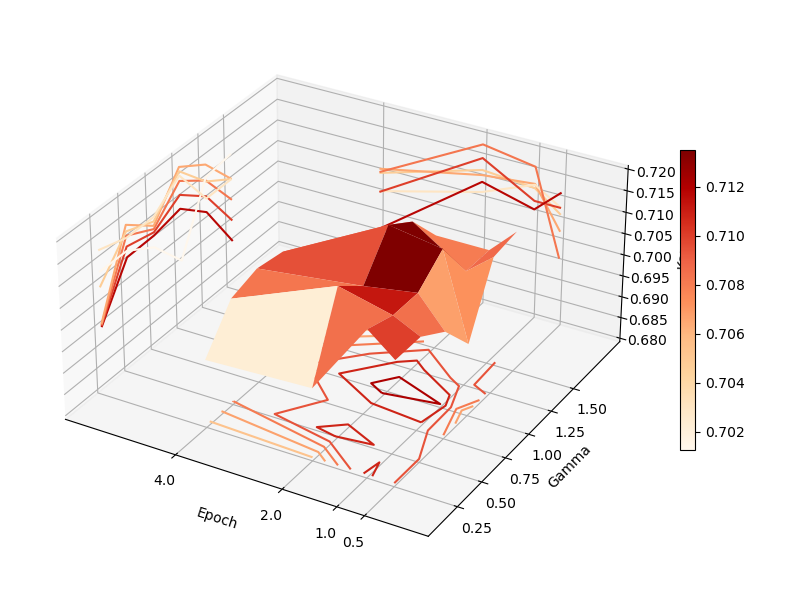

In [9]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)
#Make data
Y = np.arange(0.25, 1.75, 0.25)
X = np.array([0.5, 1.0, 2.0, 4.0])
X, Y = np.meshgrid(X, Y)
Z = np.array(result_z(X, Y))

cs = ax1.plot_surface(X, Y, Z, rcount=200, ccount=200, cmap=cm.OrRd)
ax1.set_yticks([0.25,0.50,0.75,1.00,1.25,1.50])
ax1.set_xticks([0.5,1.0,2.0,4.0])
ax1.set_xlim(6, -0.5)
ax1.set_ylim(0, 2)
ax1.set_zlim(0.68, 0.72)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Gamma')
ax1.set_zlabel('Kappa')
ax1.contour(X,Y,Z,zdir='z',offset=0.68, cmap=cm.OrRd)
ax1.contour(X,Y,Z,zdir='x',offset=6, cmap=cm.OrRd)
ax1.contour(X,Y,Z,zdir='y',offset=2, cmap=cm.OrRd)

fig1.colorbar(cs, shrink = 0.5)
fig1.gca().set_box_aspect((2, 2, 1))
fig1.set_size_inches(8, 6)
plt.show()

C:\Users\15972\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,9 m=24 fp=0.000087 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\15972\AppData\Local\Temp\ipykernel_14952\3958041078.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax2 = Axes3D(fig2)


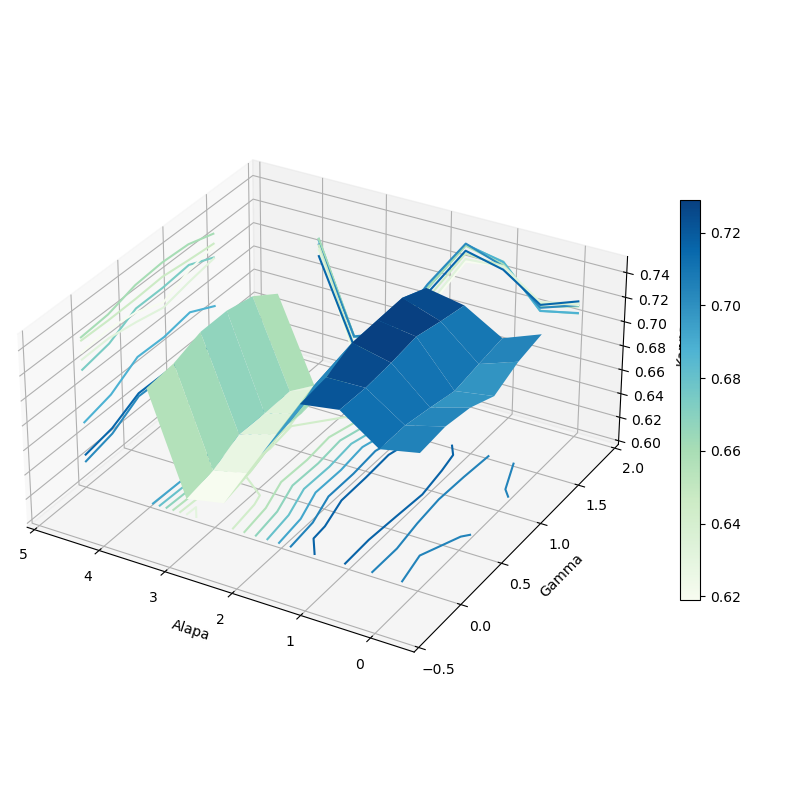

In [8]:
X = np.array([0.5, 1.0, 2.0, 4.0])
Y = np.arange(0.25, 1.75, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array(result_z(X, Y))


xnew, ynew = np.mgrid[0:4:8j, 0:1.5:6j]
tck = interpolate.bisplrep(X, Y, Z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)



fig2 = plt.figure()
ax2 = Axes3D(fig2)
cs = ax2.plot_surface(xnew, ynew, znew, cmap=cm.GnBu, rstride=1, cstride=1, alpha=None, antialiased=True)
ax2.set_xlabel('Alapa')
ax2.set_ylabel('Gamma')
ax2.set_zlabel('Kappa')
ax2.set_xlim(5, -0.5)
ax2.set_ylim(-0.5, 2)
ax2.set_zlim(0.6, 0.75)
ax2.contour(xnew, ynew,znew,zdir='z',offset=0.6, cmap=cm.GnBu)
ax2.contour(xnew, ynew,znew,zdir='x',offset=5, cmap=cm.GnBu)
ax2.contour(xnew, ynew,znew,zdir='y',offset=2, cmap=cm.GnBu)
fig2.colorbar(cs, shrink = 0.5)
fig2.gca().set_box_aspect((2, 2, 1))
fig2.set_size_inches(8, 8)
plt.show()
